<a href="https://colab.research.google.com/github/Minh-A/Pytorch_DeepLearning/blob/main/Pytorch_book_0106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1월 6일: 다층퍼셉트론

In [76]:
# 파이토치 라이브러리 임포트
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# sklearn 라이브러리 임포트
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# pandas 라이브러리 임포트
import pandas as pd

In [97]:
wine = load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [98]:
pd.DataFrame(wine.data, columns= wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [99]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [100]:
wine_data = wine.data[0:130]
wine_target = wine.target[0:130]

In [101]:
train_x, test_x, train_y, test_y = train_test_split(wine_data, wine_target, test_size = 0.2)

print(len(train_x))
print(len(test_x))

104
26


In [ ]:
train_x = torch.from_numpy(train_x).float()
train_y = torch.from_numpy(train_y).long()

test_x = torch.from_numpy(test_x).float()
test_y = torch.from_numpy(test_y).long()

print(train_x.shape)
print(train_y.shape)

torch.Size([104, 13])
torch.Size([104])


> Numpy 배열을 텐서로 변환
* torch.from_numpy()

> 변수들의 합쳐서 하나의 데이터 집합을 생성
* TensorDataset()

> 데이터 집합을 미니배치로 나누어
* DataLoader()

In [ ]:
train = TensorDataset(train_x, train_y)

print(train[0])

# 미니배치로 분할
train_loader = DataLoader(train, batch_size=16, shuffle=True)

(tensor([1.2040e+01, 4.3000e+00, 2.3800e+00, 2.2000e+01, 8.0000e+01, 2.1000e+00,
        1.7500e+00, 4.2000e-01, 1.3500e+00, 2.6000e+00, 7.9000e-01, 2.5700e+00,
        5.8000e+02]), tensor(1))


In [ ]:
for i,b in train_loader:
  print(b)

  # 임마가 배치사이즈 16개
  # 전체 텐서는 7개

tensor([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1])
tensor([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0])
tensor([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0])
tensor([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])
tensor([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0])
tensor([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([0, 0, 1, 1, 1, 0, 0, 1])


In [ ]:
# 신경망 구성
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(13,96)
    self.fc2 = nn.Linear(96,96)
    self.fc6 = nn.Linear(96,2)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc2(x))
    x = self.fc6(x)
    return F.log_softmax(x)

# 인스턴스 생성
model = Net()

> 초기 모듈을 생성
* nn.Modeule

> 층 (선형변환)
* nn.Linear()    여기에 bias도 들어간다잉

> 활성화 함수 (앞의 F는 functional의 약자)
* F.relu()     : Relu함수
* F.log_softmax   : 로그소프트맥스 함수

> 크로스엔트로피 설명
* https://hyunw.kim/blog/2017/10/26/Cross_Entropy.html

In [ ]:
# 모형 학습

# 오차함수 객체
criterion = nn.CrossEntropyLoss()

# 최적화 담당
optimizer = optim.SGD(model.parameters(), lr = 0.01)  #경사하강법은 SGD

# 학습시작
for epoch in range(300):
  total_loss = 0

  for train_x, train_y in train_loader:
    train_x, train_y = Variable(train_x), Variable(train_y)  #이거만다 사용하너

    optimizer.zero_grad()  # 경사초기화

    output = model(train_x)  # 순전파 계산

    loss = criterion(output, train_y)  # 오차 계산
    loss.backward()  # 역전파 계산

    optimizer.step()  #가중치 업데이트

    total_loss += loss.data  # 누적오차 계산
  
  if (epoch+1) % 50 == 0:
    print(epoch+1, float(total_loss))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


50 2.1234989166259766
100 2.3042960166931152
150 1.5479601621627808
200 2.2357945442199707
250 1.38120698928833
300 1.407052755355835


> 오차 함수
* nn.CrossEntropyLoss()  # 크로스엔트로피

> 경사하강법으로 최적화
* optim.SGD(model.parameters(), lr = 0.01)

> 래핑과 계산과정 기록 -- 먼데이거
* Variable()

> 경사의 합을 구함
* backward()

In [ ]:
test_x, test_y = Variable(test_x), Variable(test_y)   # 이거 안해도 문제 없움

# 출력이 0또는 1이 되도록
result = torch.max(model(test_x).data, 1)[1]

# 측정
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())
accuracy

# torch.max()는 최댓값을 반환하여 값을 매기는데, 이게 두개의 열이라면 첫 열이 크면 0을 나타내고, 두번째 열이 크면 1을 나타냄(그 위치?를 나타낸다고 볼 수 있우)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


0.8846153846153846

> 최댓값 반환
* torch.max()
* 그 위치를 반환한다고 할 수 있또(아래 두 코드창을 보삼!!)

In [ ]:
pd.DataFrame(torch.max(model(test_x).data,1))  
# torch.max()안에 0과1은 행과 열로 큰 것을 나타내는 것임!!!
# 0은 행의 순서 중에서 제일 큰것을 나타냄 (그러니까 열의 개수만큼 나옴)
# 1은 열의 순서 중에서 제일 큰것을 나타냄 (행의 개수만큼 나옴)
# 조금 헷갈리지만 직접해보삼 ㅋㅋㅋ

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,tensor(-0.0015),tensor(-0.0309),tensor(-1.7762e-05),tensor(-0.6908),tensor(-0.0019),tensor(-0.0018),tensor(-0.5185),tensor(-0.0032),tensor(-0.2902),tensor(-0.0009),tensor(-0.0002),tensor(-0.0081),tensor(-0.2040),tensor(-0.3346),tensor(-0.0003),tensor(-0.0054),tensor(-0.0010),tensor(-0.6745),tensor(-0.0137),tensor(-0.0028),tensor(-0.0017),tensor(-0.0094),tensor(-0.0003),tensor(-0.0015),tensor(-0.0165),tensor(-0.3060)
1,tensor(1),tensor(0),tensor(0),tensor(0),tensor(1),tensor(0),tensor(1),tensor(1),tensor(1),tensor(0),tensor(0),tensor(0),tensor(1),tensor(0),tensor(1),tensor(0),tensor(0),tensor(1),tensor(0),tensor(1),tensor(1),tensor(0),tensor(0),tensor(1),tensor(0),tensor(0)


In [ ]:
pd.DataFrame(model(test_x).data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


,0,1
0,tensor(-6.4935),tensor(-0.0015)
1,tensor(-0.0309),tensor(-3.4927)
2,tensor(-1.7762e-05),tensor(-10.9375)
3,tensor(-0.6908),tensor(-0.6955)
4,tensor(-6.2532),tensor(-0.0019)
5,tensor(-0.0018),tensor(-6.2953)
6,tensor(-0.9049),tensor(-0.5185)
7,tensor(-5.7442),tensor(-0.0032)
8,tensor(-1.3789),tensor(-0.2902)
9,tensor(-0.0009),tensor(-7.0173)


# 손글씨 이미지 분류

In [1]:
# 파이토치 라이브러리 임포트
import torch
from torch.autograd import Variable  # 자동미분기능 제공... 흠..
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# sklearn 라이브러리 임포트
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml  # 다운싫어
from sklearn import datasets, model_selection

# pandas 라이브러리 임포트
import pandas as pd

# matplotlib 라이브러리 임포트
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
# GPU로 실행, 모델이랑 데이터를 to.(device)로 GPU로 보냄
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

* https://teddylee777.github.io/scikit-learn/sklearn%EC%9C%BC%EB%A1%9C-mnist-%EC%86%90%EA%B8%80%EC%94%A8%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0

In [3]:
# 데이터
# 다운 받기 싫오
mnist = fetch_openml('mnist_784')
mnist.data.shape

(70000, 784)

In [4]:
# 정규화
mnist_data = mnist.data / 255  # 여기서 255는 정규화를 하기 위한 수

pd.DataFrame(mnist_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.576471,0.988235,0.164706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


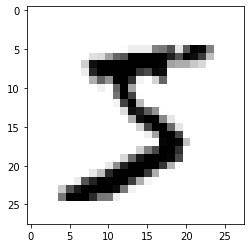

In [6]:
plt.imshow(mnist_data[0].reshape(28,28), cmap= cm.gray_r)
plt.show()

In [7]:
# 타겟 변수 설정
mnist_label = mnist.target
mnist_label

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
# 넘파이 타입을 int로 변환
import numpy as np
mnist_label = np.array(mnist_label, dtype=int)
mnist_label

array([5, 0, 4, ..., 4, 5, 6])

In [100]:
# 훈련
train_size = 5000  # 사이즈 결정
test_size = 500

train_x, test_x, train_y, test_y = model_selection.train_test_split(mnist_data, mnist_label, train_size = train_size, test_size = test_size)

In [29]:
train_x.shape

(5000, 784)

In [30]:
train_y

array([5, 1, 8, ..., 5, 8, 2])

In [101]:
# 넘파이에서 토치 변환시 타입은 object가 되면 안된당!!
# .to(device)로 GPU로 데이터 전송
train_x = torch.from_numpy(train_x).float().to(device)
train_y = torch.from_numpy(train_y).long().to(device)

test_x = torch.from_numpy(test_x).float().to(device)
test_y = torch.from_numpy(test_y).long().to(device)

print(train_x.shape)
print(train_y.shape)

torch.Size([5000, 784])
torch.Size([5000])


In [102]:
train = TensorDataset(train_x, train_y)

print(train[0])

# 미니배치로 분할 (100건 단위로 분할)
train_loader = DataLoader(train, batch_size=100, shuffle=True)

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000,

In [103]:
for i,b in train_loader:
  print(b)

  # 임마가 배치사이즈 100개
  # 전체 텐서는 7개

tensor([4, 6, 3, 0, 1, 5, 0, 7, 2, 4, 0, 4, 2, 1, 8, 9, 5, 2, 9, 1, 4, 7, 4, 7,
        1, 2, 2, 3, 8, 4, 2, 6, 9, 6, 0, 6, 0, 1, 5, 7, 6, 3, 9, 2, 9, 7, 8, 5,
        3, 9, 5, 1, 2, 2, 9, 4, 0, 0, 1, 1, 1, 2, 8, 4, 0, 4, 7, 5, 9, 8, 3, 8,
        4, 5, 7, 9, 3, 9, 4, 7, 4, 0, 8, 7, 4, 7, 2, 2, 1, 1, 8, 9, 4, 7, 2, 9,
        4, 1, 3, 6], device='cuda:0')
tensor([1, 7, 9, 7, 4, 3, 0, 4, 4, 9, 3, 3, 4, 9, 2, 3, 4, 7, 4, 9, 5, 8, 2, 1,
        1, 6, 3, 6, 7, 8, 9, 9, 3, 5, 3, 8, 7, 9, 7, 5, 6, 0, 6, 1, 5, 0, 9, 7,
        8, 9, 6, 7, 4, 1, 6, 7, 1, 1, 2, 5, 2, 9, 4, 4, 9, 2, 8, 6, 5, 6, 7, 9,
        9, 3, 8, 2, 3, 5, 1, 7, 3, 4, 3, 7, 3, 6, 6, 0, 2, 5, 1, 6, 7, 1, 1, 9,
        9, 5, 9, 4], device='cuda:0')
tensor([3, 3, 1, 5, 1, 4, 0, 2, 9, 1, 8, 7, 6, 8, 0, 8, 3, 3, 4, 0, 1, 3, 3, 6,
        0, 1, 2, 2, 7, 1, 5, 8, 1, 1, 6, 3, 0, 9, 5, 4, 2, 4, 8, 3, 1, 3, 9, 8,
        7, 7, 5, 2, 3, 9, 0, 5, 5, 7, 1, 5, 8, 6, 6, 1, 8, 3, 2, 0, 1, 2, 6, 9,
        4, 7, 7, 8, 5, 1, 8, 6, 6, 1, 1, 9, 

In [34]:
# 신경망 구성
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,256)
    self.fc3 = nn.Linear(256,256)
    self.fc4 = nn.Linear(256,128)
    self.fc5 = nn.Linear(128,128)
    self.fc6 = nn.Linear(128,10)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = F.dropout(x, training=self.training)  # 무엇을 훈련 할지 명시 해야함 (training=self.training)
    x = self.fc6(x)
    return F.log_softmax(x)

# 인스턴스 생성
model = Net().to(device)

> 드롭아웃
* F.dropout(입력 , p = 각 노드의 드롭아웃 확률)
* torch.nn.functional.dropout에서는 p값과 무엇을 훈련할지 명시 해야함 (training=self.training)!!!

> Variable
* Variable()
* 미분을 가능하게 : ".backward()"에 사용하는 변수
* https://dororongju.tistory.com/142

In [35]:
# 모형 학습

# 오차함수 객체
criterion = nn.CrossEntropyLoss()

# 최적화 담당
optimizer = optim.SGD(model.parameters(), lr = 0.01)  # 확률적경사하강법은 SGD (데이터의 미니배치를 사용하여 경사하강법을 구현)

# 학습시작
for epoch in range(1000):
  total_loss = 0

  for train_x, train_y in train_loader:
    train_x, train_y = Variable(train_x), Variable(train_y)  # 미분을 가능하게 : ".backward()"에 사용하는 변수인데 사용안해도 되던데.... 아리송송

    optimizer.zero_grad()  # 경사초기화

    output = model(train_x)  # 순전파 계산

    loss = criterion(output, train_y)  # 오차 계산
    loss.backward()  # 역전파 계산

    optimizer.step()  #가중치 업데이트

    total_loss += loss.data  # 누적오차 계산
  
  if (epoch+1) % 100 == 0:
    print(epoch+1, float(total_loss))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


100 46.75200271606445
200 3.4959702491760254
300 0.7158715724945068
400 0.2541388273239136
500 0.1834527850151062
600 0.09309367090463638
700 0.08949225395917892
800 0.047558464109897614
900 0.05242578685283661
1000 0.04234261438250542


In [130]:
test_x, test_y = Variable(test_x), Variable(test_y)   # 이거 안해도 문제 없움

# 출력이 0또는 1이 되도록
result = torch.max(model(test_x).data.cpu(), 1)[1]  # 모델이 분류하는 거에 따라 측정값이 달라지네

# 측정
accuracy = sum(test_y.data.cpu().numpy() == result.numpy()) / len(test_y.data.cpu().numpy())
accuracy

# torch.max()는 최댓값을 반환하여 값을 매기는데, 이게 두개의 열이라면 첫 열이 크면 0을 나타내고, 두번째 열이 크면 1을 나타냄(그 위치?를 나타낸다고 볼 수 있우)
# .cpu()뒤에 .detach를 붙이나 안붙이나 차이가 왜 없는 거 같냐...

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


0.906